In [45]:
# *NumPy*

#*7. Matrix multiplication between two 2D arrays*

import numpy as np

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

result = np.dot(A, B)
print(result)

[[19 22]
 [43 50]]


In [46]:
#8. Dot and Cross product of two vectors*

v1 = np.array([1, 2, 3])
v2 = np.array([4, 5, 6])

dot_product = np.dot(v1, v2)
cross_product = np.cross(v1, v2)

print("Dot:", dot_product)
print("Cross:", cross_product)

Dot: 32
Cross: [-3  6 -3]


In [48]:
#9. Generate 20 random integers and find unique elements*

arr = np.random.randint(0, 50, 20)
unique_elements = np.unique(arr)
print("Array:", arr)
print("Unique:", unique_elements)


Array: [41 48 11  8  9 21 38 29  8 31 32 21  4 31 37  7  9 30 26 24]
Unique: [ 4  7  8  9 11 21 24 26 29 30 31 32 37 38 41 48]


In [50]:
#10. Inverse of a matrix using NumPy*
matrix = np.array([[1, 2], [3, 4]])
inverse = np.linalg.inv(matrix)
print(inverse)


[[-2.   1. ]
 [ 1.5 -0.5]]


In [2]:
# *Pandas*

#*11. Load CSV and show first 10 rows*

import pandas as pd

df = pd.read_csv(r"C:\Users\radhakavya\Downloads\archive (3)\hypertension_dataset.csv")
print(df.head(10))


   Age  Salt_Intake  Stress_Score       BP_History  Sleep_Duration   BMI  \
0   69          8.0             9           Normal             6.4  25.8   
1   32         11.7            10           Normal             5.4  23.4   
2   78          9.5             3           Normal             7.1  18.7   
3   38         10.0            10     Hypertension             4.2  22.1   
4   41          9.8             1  Prehypertension             5.8  16.2   
5   20         10.8             3     Hypertension             5.2  21.9   
6   39          8.9             0           Normal             7.8  27.6   
7   70          5.9             1     Hypertension             7.2  25.8   
8   19          9.3             7           Normal             4.7  36.5   
9   47          7.2             5           Normal             6.2  24.3   

      Medication Family_History Exercise_Level Smoking_Status Has_Hypertension  
0            NaN            Yes            Low     Non-Smoker              Yes  
1

In [3]:
grouped = df.groupby('Has_Hypertension')[['Salt_Intake', 'BMI']].agg(['mean', 'sum'])
print(grouped)


                 Salt_Intake                BMI         
                        mean     sum       mean      sum
Has_Hypertension                                        
No                  8.294229  7904.4  25.334103  24143.4
Yes                 8.750969  9031.0  26.644380  27497.0


In [4]:
df['Salt_Intake'] = df['Salt_Intake'].fillna(df['Salt_Intake'].mean())

print (df['Salt_Intake']) 

0        8.0
1       11.7
2        9.5
3       10.0
4        9.8
        ... 
1980    10.2
1981     8.9
1982     5.9
1983     7.4
1984     7.3
Name: Salt_Intake, Length: 1985, dtype: float64


In [5]:
import pandas as pd

# df1
df1 = pd.DataFrame({
    'ID': [1, 2, 3],
    'Name': ['kavya', 'lavanya', 'murali']
})

# df2
df2 = pd.DataFrame({
    'ID': [2, 3, 4],
    'Age': [25, 30, 35]
})
inner_merged = pd.merge(df1, df2, on='ID', how='inner')
print("Inner Join:\n", inner_merged)


Inner Join:
    ID     Name  Age
0   2  lavanya   25
1   3   murali   30


In [6]:
numeric_columns = ['Age', 'Salt_Intake', 'Stress_Score', 'Sleep_Duration', 'BMI']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print (df[col])

0       25.8
1       23.4
2       18.7
3       22.1
4       16.2
        ... 
1980    25.0
1981    16.9
1982    18.9
1983    29.2
1984    18.6
Name: BMI, Length: 1985, dtype: float64


In [7]:
filtered_df = df[(df['Age'] >= 20) & (df['Age'] <= 40)]
print(filtered_df)

      Age  Salt_Intake  Stress_Score       BP_History  Sleep_Duration   BMI  \
1      32         11.7            10           Normal             5.4  23.4   
3      38         10.0            10     Hypertension             4.2  22.1   
5      20         10.8             3     Hypertension             5.2  21.9   
6      39          8.9             0           Normal             7.8  27.6   
14     38          9.1             6  Prehypertension             7.7  29.0   
...   ...          ...           ...              ...             ...   ...   
1972   39          8.1             6  Prehypertension             4.3  35.2   
1978   38          7.4             9  Prehypertension             6.2  23.6   
1981   29          8.9             4     Hypertension             6.9  16.9   
1983   35          7.4             8  Prehypertension             8.2  29.2   
1984   38          7.3             0           Normal             8.3  18.6   

         Medication Family_History Exercise_Level S

In [8]:
pivot = df.pivot_table(index='Exercise_Level', values='Salt_Intake', aggfunc=['mean', 'sum'])
print(pivot)


                      mean         sum
               Salt_Intake Salt_Intake
Exercise_Level                        
High              8.586445      3357.3
Low               8.506090      7961.7
Moderate          8.535562      5616.4


In [9]:
df['Family_History'] = df['Family_History'].apply(lambda x: x.upper() if isinstance(x, str) else x)
print(df['Family_History']) 

0       YES
1        NO
2        NO
3        NO
4        NO
       ... 
1980    YES
1981    YES
1982    YES
1983    YES
1984    YES
Name: Family_History, Length: 1985, dtype: object


In [10]:
df['Stress_Level'] = pd.cut(df['Stress_Score'], bins=[-1, 3, 7, 10], labels=['Low', 'Medium', 'High'])
print(df['Stress_Level']) 

0         High
1         High
2          Low
3         High
4          Low
         ...  
1980       Low
1981    Medium
1982      High
1983      High
1984       Low
Name: Stress_Level, Length: 1985, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


In [11]:
df['Medication'] = df['Medication'].replace('Other', 'ACE Inhibitor')


print(df['Medication'])

0                 NaN
1                 NaN
2                 NaN
3       ACE Inhibitor
4       ACE Inhibitor
            ...      
1980         Diuretic
1981              NaN
1982    ACE Inhibitor
1983              NaN
1984              NaN
Name: Medication, Length: 1985, dtype: object


In [12]:
df['Salt_Intake'] = pd.to_numeric(df['Salt_Intake'], errors='coerce')
df = df.dropna(subset=['Salt_Intake'])
print(df)



      Age  Salt_Intake  Stress_Score       BP_History  Sleep_Duration   BMI  \
0      69          8.0             9           Normal             6.4  25.8   
1      32         11.7            10           Normal             5.4  23.4   
2      78          9.5             3           Normal             7.1  18.7   
3      38         10.0            10     Hypertension             4.2  22.1   
4      41          9.8             1  Prehypertension             5.8  16.2   
...   ...          ...           ...              ...             ...   ...   
1980   56         10.2             0           Normal             6.5  25.0   
1981   29          8.9             4     Hypertension             6.9  16.9   
1982   64          5.9             9           Normal             5.6  18.9   
1983   35          7.4             8  Prehypertension             8.2  29.2   
1984   38          7.3             0           Normal             8.3  18.6   

         Medication Family_History Exercise_Level S

In [13]:
df.drop_duplicates(inplace=True)



In [14]:
print(df)

      Age  Salt_Intake  Stress_Score       BP_History  Sleep_Duration   BMI  \
0      69          8.0             9           Normal             6.4  25.8   
1      32         11.7            10           Normal             5.4  23.4   
2      78          9.5             3           Normal             7.1  18.7   
3      38         10.0            10     Hypertension             4.2  22.1   
4      41          9.8             1  Prehypertension             5.8  16.2   
...   ...          ...           ...              ...             ...   ...   
1980   56         10.2             0           Normal             6.5  25.0   
1981   29          8.9             4     Hypertension             6.9  16.9   
1982   64          5.9             9           Normal             5.6  18.9   
1983   35          7.4             8  Prehypertension             8.2  29.2   
1984   38          7.3             0           Normal             8.3  18.6   

         Medication Family_History Exercise_Level S

In [15]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['Age', 'Salt_Intake', 'Stress_Score', 'Sleep_Duration', 'BMI']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print(df[numeric_cols].head())


        Age  Salt_Intake  Stress_Score  Sleep_Duration       BMI
0  0.959963    -0.266590      1.279847       -0.033883 -0.047723
1 -0.943609     1.588600      1.598165       -0.682468 -0.579671
2  1.422994     0.485514     -0.630061        0.420126 -1.621403
3 -0.634921     0.736216      1.598165       -1.460769 -0.867810
4 -0.480578     0.635935     -1.266698       -0.423034 -2.175515


In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Family_History_encoded'] = le.fit_transform(df['Family_History'])

print(df[['Family_History', 'Family_History_encoded']].head())



  Family_History  Family_History_encoded
0            YES                       1
1             NO                       0
2             NO                       0
3             NO                       0
4             NO                       0


In [19]:
from sklearn.model_selection import train_test_split
X = df.drop('Has_Hypertension', axis=1) 
y = df['Has_Hypertension']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True)
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")

Training set: (1588, 12)
Testing set: (397, 12)


In [20]:
#26. Perform an exploratory data analysis on a dataset by calculating summary statistics (mean,median, mode, standard deviation) for numerical columns.

import pandas as pd

numeric_df = df.select_dtypes(include='number')
mean_vals = numeric_df.mean()
median_vals = numeric_df.median()
mode_vals = numeric_df.mode().iloc[0]
std_vals = numeric_df.std()
summary_stats = pd.DataFrame({
    'Mean': mean_vals,
    'Median': median_vals,
    'Mode': mode_vals,
    'Std Dev': std_vals
})

print("📊 Summary Statistics for Numerical Columns:")
print(summary_stats)


📊 Summary Statistics for Numerical Columns:
                                Mean    Median      Mode   Std Dev
Age                    -9.485835e-17 -0.017547  1.474442  1.000252
Salt_Intake            -7.069632e-16 -0.015888  0.435374  1.000252
Stress_Score           -8.993645e-17  0.006575  0.324893  1.000252
Sleep_Duration         -5.065078e-16  0.030975  0.030975  1.000252
BMI                    -1.288642e-16 -0.025559 -0.225039  1.000252
Family_History_encoded  4.962217e-01  0.000000  0.000000  0.500112


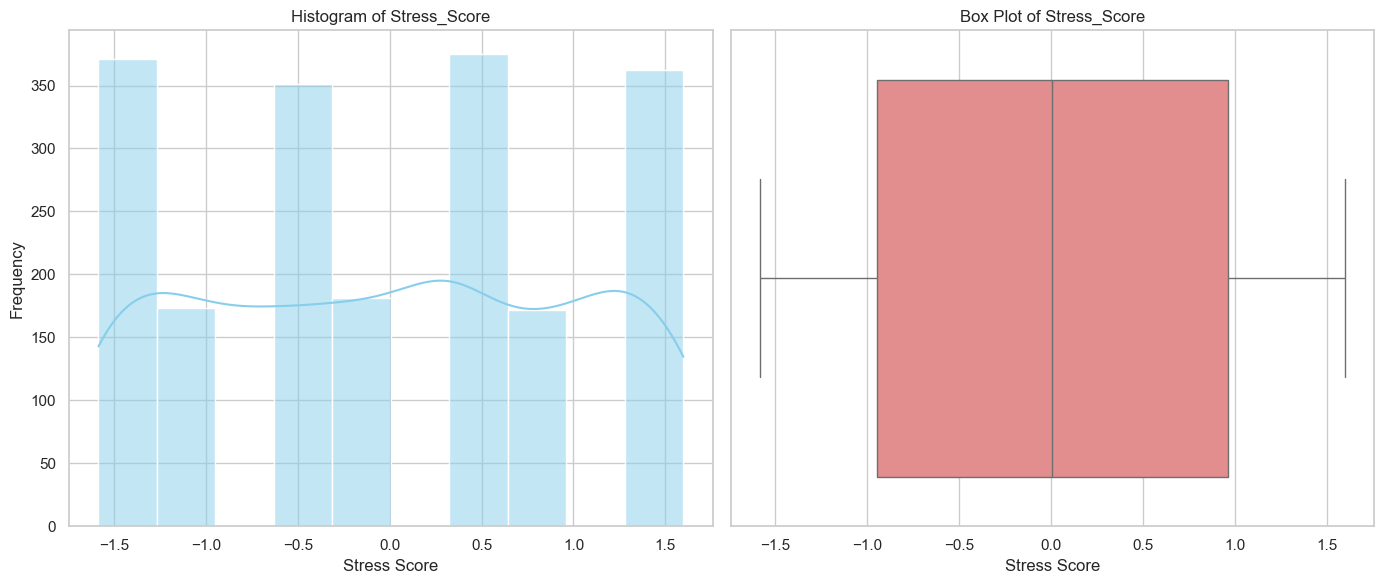

In [21]:
#27. Visualize the distribution of a numerical column using a histogram and a box plot. Identify
and explain any outliers.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style='whitegrid')
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Stress_Score'], bins=10, kde=True, color='skyblue')
plt.title('Histogram of Stress_Score')
plt.xlabel('Stress Score')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Stress_Score'], color='lightcoral')
plt.title('Box Plot of Stress_Score')
plt.xlabel('Stress Score')
plt.tight_layout()
plt.show()


In [22]:
Q1 = df['Stress_Score'].quantile(0.25)
Q3 = df['Stress_Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Stress_Score'] < lower_bound) | (df['Stress_Score'] > upper_bound)]

print(f"Outlier Thresholds: < {lower_bound:.2f} or > {upper_bound:.2f}")
print(f"Number of outliers in 'Stress_Score': {len(outliers)}")
print(outliers[['Stress_Score']])


Outlier Thresholds: < -3.81 or > 3.83
Number of outliers in 'Stress_Score': 0
Empty DataFrame
Columns: [Stress_Score]
Index: []


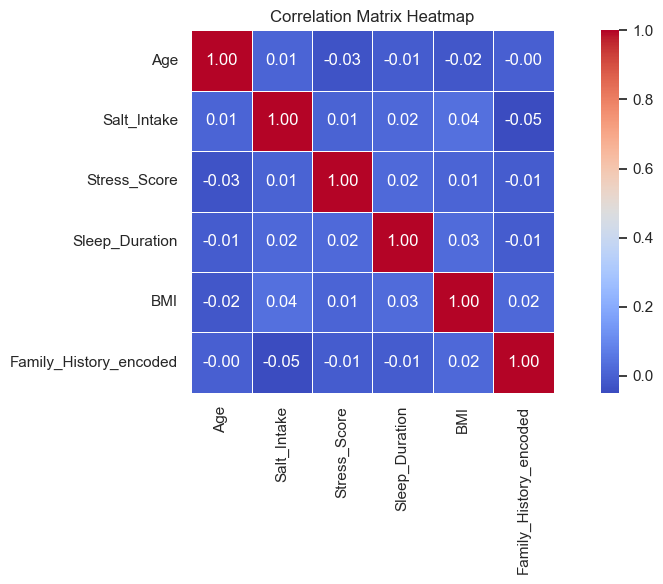

In [23]:
#28. Create a correlation matrix of a DataFrame and visualize it using a heatmap. Interpret the results.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()


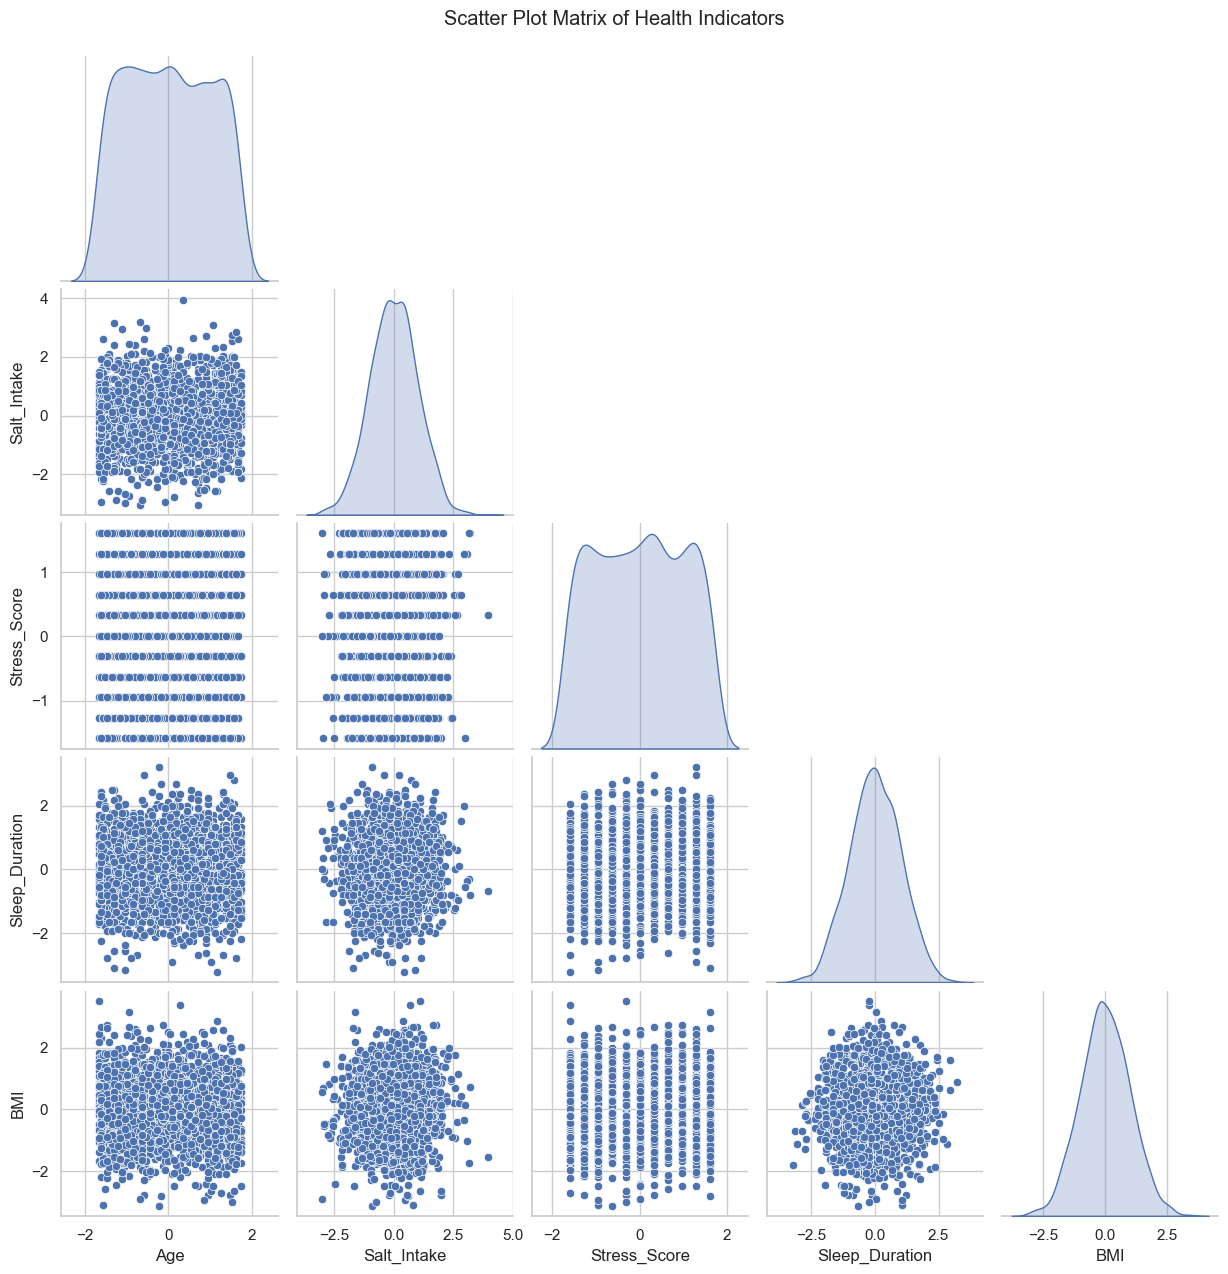

In [24]:
#29. Use Pandas to create a scatter plot matrix of multiple columns in a dataset and analyze the relationships between them.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
numeric_cols = ['Age', 'Salt_Intake', 'Stress_Score', 'Sleep_Duration', 'BMI']
scatter_df = df[numeric_cols].dropna()
sns.pairplot(scatter_df, diag_kind='kde', corner=True)
plt.suptitle("Scatter Plot Matrix of Health Indicators", y=1.02)
plt.show()


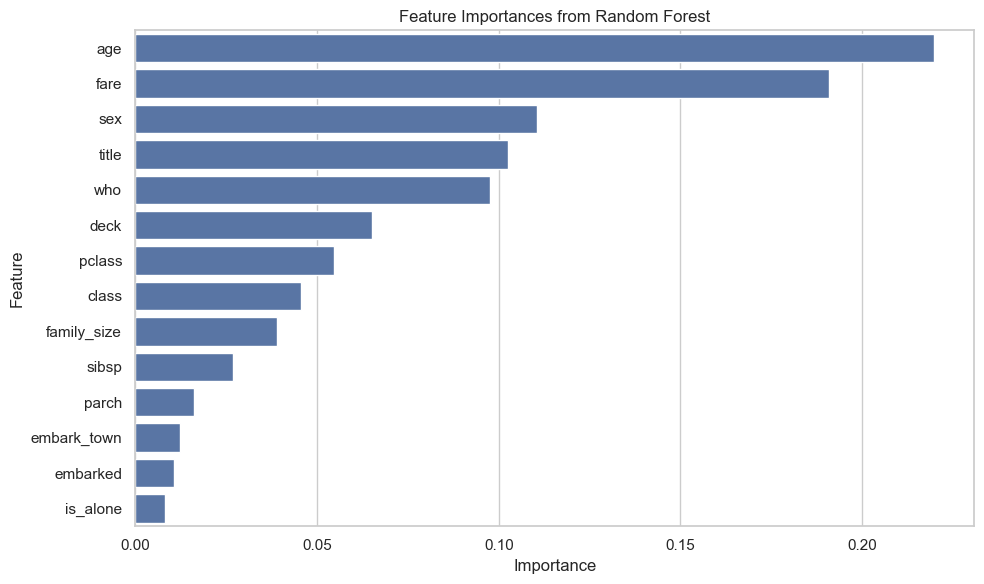

In [34]:
#30. Perform feature engineering on a dataset by creating new features and then visualize their importance using a bar chart
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
df = sns.load_dataset('titanic')
df.dropna(subset=['age', 'embarked', 'fare'], inplace=True)
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['is_alone'] = (df['family_size'] == 1).astype(int)
df['title'] = df['who'] + "_" + df['sex']
label_encoders = {}
categorical_cols = ['sex', 'embarked', 'class', 'who', 'deck', 'embark_town', 'title']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
            'embarked', 'class', 'who', 'deck', 'embark_town',
            'family_size', 'is_alone', 'title']
X = df[features]
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()
